In [1]:
library(Seurat)
library(Matrix)
library(SeuratWrappers)

Attaching SeuratObject



In [8]:
expr <- readMM('../../data/pbmc_10k_v3/matrix.mtx')
rownames(expr) <- read.csv('../../data/pbmc_10k_v3/features.tsv')$x
colnames(expr) <- read.csv('../../data/pbmc_10k_v3/barcodes.tsv')$x
pbmc <- CreateSeuratObject(expr)
pbmc <- NormalizeData(pbmc)
pbmc <- FindVariableFeatures(pbmc, selection.method='vst', nfeatures=3000)
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
pbmc <- CellCycleScoring(pbmc, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
pbmc <- ScaleData(pbmc, vars.to.regress = c("S.Score", "G2M.Score"), features = rownames(pbmc))
#pbmc <- ScaleData(pbmc, features = rownames(pbmc))

Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, not searching for symbol synonyms”
Regressing out S.Score, G2M.Score

Centering and scaling data matrix



# PCA

In [9]:
pbmc_pca <- RunPCA(pbmc)

PC_ 1 
Positive:  CST3, FCN1, MNDA, LYZ, FGL2, S100A9, CTSS, CSTA, PSAP, SERPINA1 
	   NCF2, TYMP, AIF1, GRN, VCAN, S100A8, TYROBP, LGALS1, CD68, MS4A6A 
	   FTL, MPEG1, CYBB, CPVL, LST1, FTH1, CD14, CLEC7A, CFD, KLF4 
Negative:  LTB, CD3E, TRAC, CD3D, TRBC2, ETS1, LCK, IL32, IL7R, CD3G 
	   TCF7, ISG20, CD69, CD27, SPOCK2, BCL11B, CD7, ARL4C, LDHB, CD2 
	   CD247, FCMR, TRBC1, NOSIP, PIK3IP1, LAT, GZMM, RORA, SKAP1, SYNE2 
PC_ 2 
Positive:  CD79A, MS4A1, IGHM, BANK1, HLA-DQA1, CD79B, IGHD, LINC00926, CD22, HLA-DQB1 
	   CD74, HLA-DRB1, HLA-DRA, TNFRSF13C, RALGPS2, BCL11A, HLA-DPB1, TCL1A, IGKC, HLA-DPA1 
	   FAM129C, VPREB3, HLA-DQA2, SPIB, MEF2C, HLA-DRB5, FCER2, SWAP70, FCRL2, BLK 
Negative:  CD247, IL32, GZMM, CD7, CTSW, CD3E, GZMA, NKG7, LCK, CST7 
	   S100A4, PRF1, KLRB1, CD3D, ARL4C, RORA, SAMD3, CCL5, KLRG1, ANXA1 
	   ZAP70, TRAC, KLRD1, GNLY, TMSB4X, ITGB2, CD3G, IL7R, TRBC1, LAT 
PC_ 3 
Positive:  GZMB, GNLY, CLIC3, KLRF1, NKG7, KLRD1, PRF1, SPON2, FGFBP2, CST7 
	   GZMA, AD

In [10]:
write.csv(Embeddings(pbmc_pca), 'pca.csv')

# SCTransform

In [5]:
pbmc_sct <- SCTransform(pbmc, vars.to.regress=c("S.Score", "G2M.Score"))

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 18501 by 9432

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”


  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 87 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 18501 genes



  |======================================================================| 100%


Computing corrected count matrix for 18501 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 2.506068 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out S.Score, G2M.Score

Centering data matrix

Set default assay to SCT



In [10]:
pbmc_sct <- RunPCA(pbmc_sct)
write.csv(Embeddings(pbmc_sct), 'sct.csv')

PC_ 1 
Positive:  KLRB1, IL32, LTB, IL7R, NKG7, CCL5, IGHM, RPS27, GZMA, TRAC 
	   IGKC, CD79A, GNLY, CD3D, TRBC1, TRBC2, RPS12, RPS29, CD3E, CTSW 
	   MS4A1, RPS18, GZMK, CST7, IGHD, RPL13, PRF1, CD7, RPSA, RPS3 
Negative:  S100A9, LYZ, S100A8, S100A12, VCAN, CTSS, FCN1, FTL, CST3, MNDA 
	   FOS, TYROBP, FTH1, NEAT1, AIF1, LGALS1, PSAP, CD14, DUSP1, S100A6 
	   MS4A6A, FGL2, TYMP, LST1, FCER1G, SRGN, RGS2, S100A4, S100A11, AC020656.1 
PC_ 2 
Positive:  NKG7, GNLY, GZMA, CCL5, KLRB1, PRF1, KLRD1, CTSW, CST7, TRDC 
	   GZMB, FGFBP2, HOPX, KLRF1, IL32, SPON2, GZMM, CD247, GZMH, CLIC3 
	   CD7, IL2RB, GZMK, HCST, KLRG1, CCL4, MATK, MYOM2, ADGRG1, CD160 
Negative:  IGHM, IGKC, CD79A, CD74, HLA-DRA, MS4A1, IGHD, TCL1A, CD79B, HLA-DPA1 
	   HLA-DRB1, HLA-DPB1, IGLC2, HLA-DQA1, BANK1, HLA-DQB1, LINC00926, CD22, CD37, RALGPS2 
	   TNFRSF13C, VPREB3, BCL11A, FCER2, SPIB, FAM129C, HLA-DQA2, FCRL5, PLPP5, IGLC3 
PC_ 3 
Positive:  IL7R, TRAC, RPS12, LDHB, CD3D, TPT1, CD3G, EEF1A1, TCF7, RPS27 
	  

# GLM-PCA

In [3]:
pbmc_gpca <- RunGLMPCA(pbmc, L=20, X=pbmc@meta.data[,c('S.Score','G2M.Score')], sz=pbmc@meta.data$nCount_RNA/mean(pbmc@meta.data$nCount_RNA))

Sparse matrices are not supported for minibatch='none'. Coercing to dense matrix. If this exhausts memory, consider setting minibatch to 'stochastic' or 'memoized'.



In [4]:
write.csv(Embeddings(pbmc_gpca, reduction='glmpca'), 'glmpca.csv')

# ARI & Silhouette

In [11]:
library(mclust)
library(cluster)

In [19]:
pca <- read.csv('pca.csv', row.names=1)
sct <- read.csv('sct.csv', row.names=1)
glmpca <- read.csv('glmpca.csv', row.names=1)
rdpca <- read.csv('rdpca.csv', header=FALSE)
rownames(rdpca) <- rownames(pca)
zinbwave <- read.csv('zinbwave.csv', row.names=1)

pbmc[['pca']] <- CreateDimReducObject(embeddings = as.matrix(pca), key = "pc_", assay='RNA')
pbmc[['sct']] <- CreateDimReducObject(embeddings = as.matrix(sct), key = "sct_", assay='RNA')
pbmc[['glmpca']] <- CreateDimReducObject(embeddings = as.matrix(glmpca), key = "glmpc_", assay='RNA')
pbmc[['rdpca']] <- CreateDimReducObject(embeddings = as.matrix(rdpca), key = "rdpc_", assay='RNA')
pbmc[['zinbwave']] <- CreateDimReducObject(embeddings = as.matrix(zinbwave), key = "zinbwave_", assay='RNA')

In [15]:
celltype <- read.csv('../../data/pbmc_10k_v3/meta.csv')$old.ident
intname <- 1:length(unique(celltype))
names(intname) <- unique(celltype)

ress <- c(0.4, 0.5, 0.9, 1.5, 2)
methods <- c('pca', 'sct', 'glmpca', 'rdpca', 'zinbwave')
aris <- data.frame(matrix(1:(length(ress)*length(methods)), nrow=length(methods)))
rownames(aris) <- methods
colnames(aris) <- ress
for (res in ress){
    for (method in methods){
        obj <- FindNeighbors(pbmc, reduction=method, dims=1:20, verbose=FALSE)
        obj <- FindClusters(obj, resolution=res, verbose=FALSE)
        
        aris[method, as.character(res)] <- adjustedRandIndex(obj$seurat_clusters, celltype)
    }
}

In [16]:
sils <- data.frame(matrix(1:length(methods), nrow=length(methods)))
rownames(sils) <- methods
colnames(sils) <- c('Silhouette')
for (method in methods){
    obj <- RunTSNE(pbmc, reduction=method, perplexity=70, dims=1:20)
    dist_mat <- dist(Embeddings(obj, reduction='tsne'))
    silscore <- silhouette(as.vector(intname[celltype]), dist_mat) 
    
    
    sils[method, 'Silhouette']<- (summary(silscore)$avg.width)

}

In [18]:
df <- cbind(aris,sils)
colnames(df) <- c(paste('ARI_', ress), 'Silhouette')
df

,ARI_ 0.4,ARI_ 0.5,ARI_ 0.9,ARI_ 1.5,ARI_ 2,Silhouette
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pca,0.9100290,0.7247540,0.6853934,0.5396084,0.4156827,0.3682913
sct,0.7189459,0.7179107,0.5361616,0.4459760,0.3415238,0.3293242
glmpca,0.7192893,0.7157210,0.6909348,0.5525960,0.4662345,0.3892233
rdpca,0.9213354,0.9223892,0.7322776,0.5208173,0.4919319,0.4124198
zinbwave,0.8693681,0.9106268,0.6812429,0.5470981,0.5055481,0.3911457


# Clustering

In [32]:
methods <- c('sct', 'rdpca')
for (method in methods){
    obj <- FindNeighbors(pbmc, reduction=method, dims=1:20)
    obj <- FindClusters(obj, resolution=0.5)
    write.csv(obj@meta.data, paste0('cluster_',method,'.csv'))
}

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9432
Number of edges: 322408

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9172
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9432
Number of edges: 364457

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9141
Number of communities: 13
Elapsed time: 1 seconds


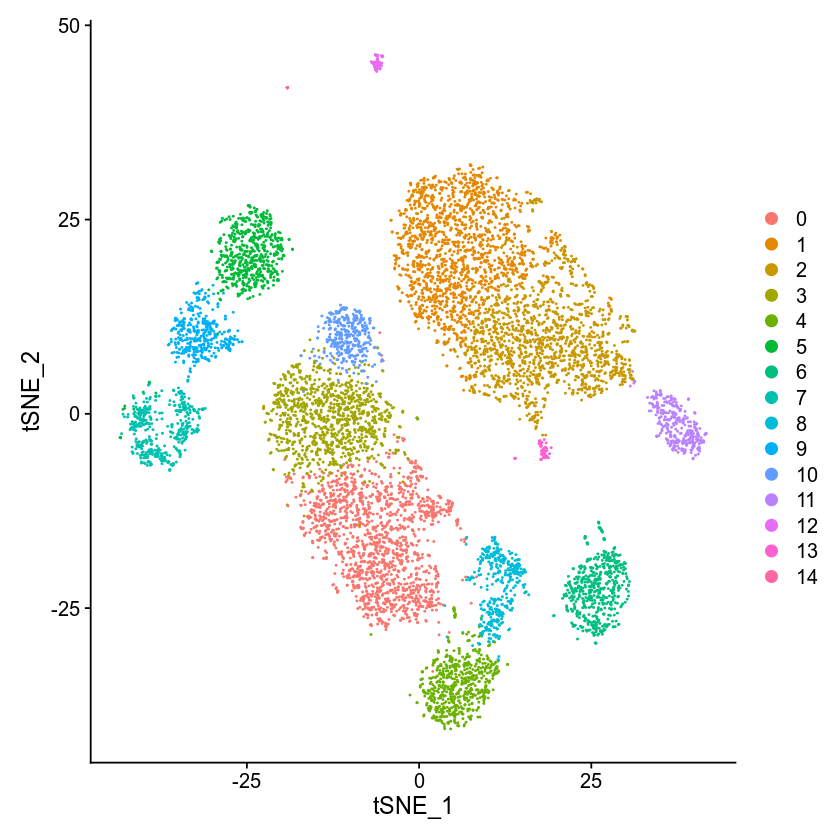

In [28]:
obj <- RunTSNE(obj, reduction='rdpca', dims=1:20)
DimPlot(obj)

# DEG

In [48]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [34]:
obj1 <- RunTSNE(pbmc, reduction='sct', dims=1:20)
obj2 <- RunTSNE(pbmc, reduction='rdpca', dims=1:20)

In [36]:
obj1 <- FindNeighbors(obj1, reduction='sct', dims=1:20)
obj1 <- FindClusters(obj1, resolution=0.5)
obj2 <- FindNeighbors(obj2, reduction='rdpca', dims=1:20)
obj2 <- FindClusters(obj2, resolution=0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9432
Number of edges: 322408

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9172
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9432
Number of edges: 364457

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9141
Number of communities: 13
Elapsed time: 1 seconds


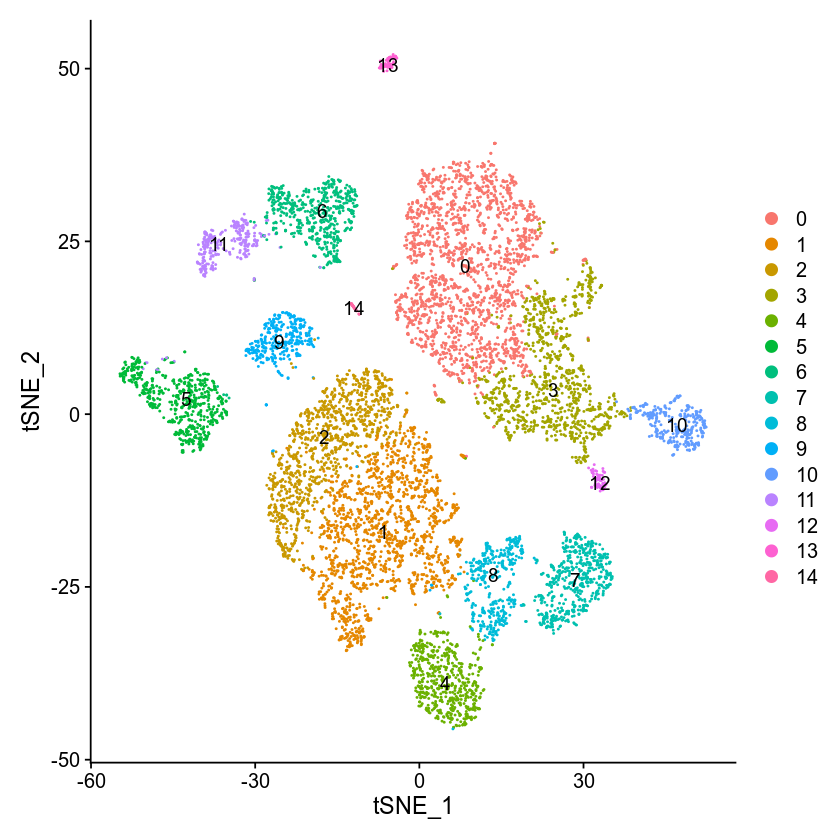

In [61]:
DimPlot(obj1, label=TRUE)

In [44]:
deg_sct <- FindMarkers(obj1, ident.2=c(0,3), ident.1=10)
deg_rdpca <- FindMarkers(obj2, ident.2=0, ident.1=9)

In [51]:
deg_sct <- deg_sct %>% filter(avg_log2FC>0) %>% filter(pct.1-pct.2>0.5)
deg_rdpca <- deg_rdpca %>% filter(avg_log2FC>0) %>% filter(pct.1-pct.2>0.5)

In [59]:
comm_genes <- intersect(rownames(deg_sct), rownames(deg_rdpca))
deg_sct <- deg_sct[comm_genes,c('avg_log2FC', 'p_val_adj')][1:15,]
deg_rdpca <- deg_rdpca[comm_genes,c('avg_log2FC', 'p_val_adj')][1:15,]

In [60]:
write.csv(deg_sct, 'deg_sct.csv')
write.csv(deg_rdpca, 'deg_rdpca.csv')